In [1]:
import numpy as np

In [2]:
array=np.array([1,2,3,4])

In [3]:
array

array([1, 2, 3, 4])

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [7]:
data=pd.read_csv('Ecommerce Customers (1).txt')

In [8]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [14]:
%pip install seaborn

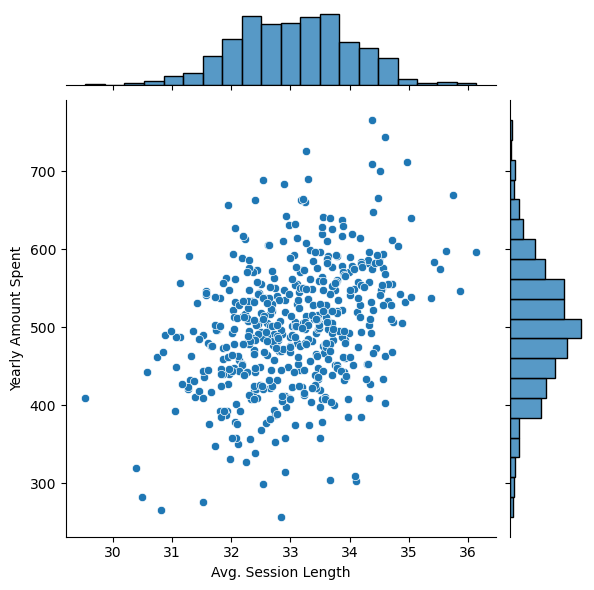

In [16]:
import seaborn as sns
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=data)
plt.show()

In [17]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [18]:
data.corr()

<ipython-input-17-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<ipython-input-18-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot:>

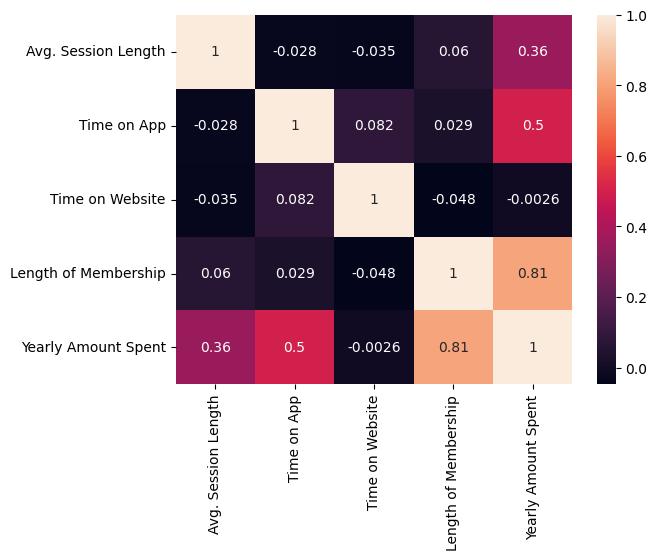

In [19]:
sns.heatmap(data.corr(),annot=True)

In [21]:
X=data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
Y=data['Yearly Amount Spent']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
mlmodel=LinearRegression()
mlmodel.fit(X_train,Y_train)

LinearRegression()

In [29]:
print(mlmodel.coef_[0],mlmodel.coef_[1],mlmodel.coef_[2],mlmodel.coef_[3])

25.596259100436125 38.78534598480308 0.31038593280147064 61.896828591741546


In [31]:
result=mlmodel.predict(X_test)

In [33]:
from sklearn import metrics
print('r2 score:',metrics.r2_score(Y_test,result))
print('MSE:', metrics.mean_squared_error(Y_test,result))

r2 score: 0.9778130629184125
MSE: 109.86374118394055


In [34]:
import sklearn
from sklearn.linear_model import Ridge
ridgemod=Ridge(alpha=0.001)
ridgemod.fit(X_train,Y_train)

Ridge(alpha=0.001)

In [35]:
ridgemod.score(X_test,Y_test)

0.9778131513337094

In [37]:
from sklearn.linear_model import Lasso
lassomod=Lasso(alpha=0.01)
lassomod.fit(X_train,Y_train)

Lasso(alpha=0.01)

In [38]:
lassomod.score(X_test,Y_test)

0.977815411335633

In [39]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=0)
elastic.fit(X_train,Y_train)

/lib/python3.11/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.916e+04, tolerance: 2.630e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0)

In [40]:
elastic.score(X_test,Y_test)

0.9778130629184127